In [2]:
!pip install gdown --quiet

import gdown
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split

# New file ID from your Google Drive link
file_id = "17vl0xRNhaAfLoRz0Rpxw1h-vBK9ektvn"
url = f"https://drive.google.com/uc?id={file_id}"
output = "cats_and_dogs.zip"

print("Downloading dataset from Google Drive...")
gdown.download(url, output, quiet=False)

# Extract ZIP
extract_path = "dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)
print("Contents:", os.listdir(extract_path))



Downloading...
From (original): https://drive.google.com/uc?id=17vl0xRNhaAfLoRz0Rpxw1h-vBK9ektvn
From (redirected): https://drive.google.com/uc?id=17vl0xRNhaAfLoRz0Rpxw1h-vBK9ektvn&confirm=t&uuid=a151025e-cc4c-4fca-aa07-93476f54b8e2
To: /content/cats_and_dogs.zip
100%|██████████| 708M/708M [00:19<00:00, 36.8MB/s]


Dataset extracted to: dataset
Contents: ['cell_images']


**Description**

Downloads a dataset (Parasitized, Uninfected) from Google Drive using the gdown library.

It saves the file as a ZIP, then extracts it into a folder named dataset.

After extraction, it shows the path and lists the contents of the dataset folder.

It automates downloading and preparing the dataset for further use.

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
data_dir = "dataset/cell_images"
output_dir = "dataset_split"

# Create train/test directories
for split in ["train", "test"]:
    for category in ["Parasitized", "Uninfected"]:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Split each category
for category in ["Parasitized", "Uninfected"]:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # Copy train images
    for img in train_imgs:
        shutil.copy(os.path.join(category_path, img),
                    os.path.join(output_dir, "train", category, img))

    # Copy test images
    for img in test_imgs:
        shutil.copy(os.path.join(category_path, img),
                    os.path.join(output_dir, "test", category, img))

print("Dataset successfully split into train and test folders!")


Dataset successfully split into train and test folders!


**Description**

It prepares the dataset for model training and evaluation.

Organizes the malaria cell images dataset by splitting it into training and testing sets. It first creates separate folders for each category (Parasitized and Uninfected) under both train and test.

Then, it randomly divides the images (80% for training, 20% for testing) and copies them into their respective folders.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "dataset_split/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    "dataset_split/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


**Description**

Prepares the dataset for training a deep learning model using Keras’ ImageDataGenerator.

The training images are rescaled and augmented with transformations like rotation, zoom, shifts, and flips to improve model generalization.

The test images are only rescaled to keep them unchanged for evaluation.

It creates train_generator and test_generator that load images from the split folders, resize them to 150×150, and assign binary class labels (Parasitized or Uninfected).


In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Description**

Builds a Convolutional Neural Network (CNN) for classifying cell images as parasitized or uninfected.

The model has convolution and pooling layers to extract image features, followed by dense layers for classification.

The final layer uses a sigmoid activation to output a probability for binary classification.

The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

In [6]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 675s 975ms/step - accuracy: 0.6040 - loss: 0.6430 - val_accuracy: 0.9383 - val_loss: 0.1770
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 668s 969ms/step - accuracy: 0.9026 - loss: 0.2577 - val_accuracy: 0.8886 - val_loss: 0.2329
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 727s 1s/step - accuracy: 0.9178 - loss: 0.2318 - val_accuracy: 0.9503 - val_loss: 0.1631
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 703s 1s/step - accuracy: 0.9229 - loss: 0.2232 - val_accuracy: 0.9537 - val_loss: 0.1612
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 663s 962ms/step - accuracy: 0.9312 - loss: 0.2043 - val_accuracy: 0.9563 - val_loss: 0.1510
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 680s 958ms/step - accuracy: 0.9340 - loss: 0.1973 - val_accuracy: 0.9570 - val_loss: 0.1288
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 685s 964ms/step - accuracy: 0.9375 - loss: 0.1919 - val_accuracy: 0.9572 - val_loss: 0.1438
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 795s 1s/step - accuracy: 0.9363 - loss: 0.

It trains the CNN model using the prepared training data (train_generator) for 10 epochs. During training, it also evaluates performance on the test set (validation_data) to monitor accuracy and loss.

In [7]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")


173/173 ━━━━━━━━━━━━━━━━━━━━ 44s 257ms/step - accuracy: 0.9517 - loss: 0.1371
Test Accuracy: 94.96%


It calculates the loss and accuracy, then prints the test accuracy as a percentage. It tells how well the model performs on unseen data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


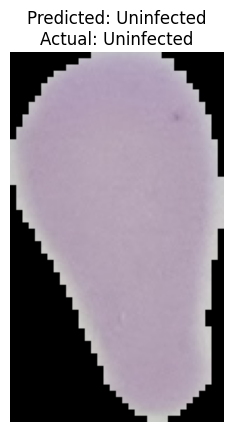

In [17]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Pick a random image from test set
category = random.choice(["Parasitized", "Uninfected"])
folder = os.path.join("dataset_split/test", category)
img_name = random.choice(os.listdir(folder))
img_path = os.path.join(folder, img_name)

# Load and preprocess
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)[0][0]

# Show result
plt.imshow(plt.imread(img_path))
plt.axis("off")

# Fix: match with class indices
pred_label = "Uninfected" if prediction > 0.5 else "Parasitized"
plt.title(f"Predicted: {pred_label}\nActual: {category}")
plt.show()



Tests the trained model on a randomly chosen image from the test set.

It loads and preprocesses the image, makes a prediction, and compares the predicted label with the actual category.

And it displays the image using Matplotlib along with the predicted and actual labels in the title.

This helps visually check how well the model classifies individual samples.

Saving C1_thinF_IMG_20150604_104722_cell_115.png to C1_thinF_IMG_20150604_104722_cell_115.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


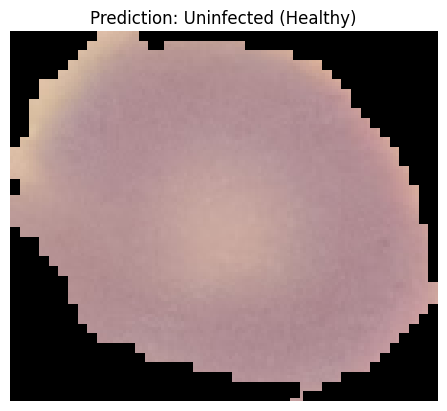

In [9]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename  # file name of uploaded image

    # 2. Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


# 3. Predict
prediction = model.predict(img_array)[0][0]

# 4. Show result
plt.imshow(plt.imread(img_path))
plt.axis("off")

# Correct mapping (since 0 = Parasitized, 1 = Uninfected)
label = "Uninfected (Healthy)" if prediction > 0.5 else "Parasitized (Infected)"
plt.title(f"Prediction: {label}")
plt.show()


It allows you to upload a custom image and test it with the trained malaria detection model.

After uploading, the image is resized, normalized, and converted into a format suitable for the model.

The model then predicts whether the cell is Parasitized (Infected) or Uninfected (Healthy).

Finally, the image is displayed with the prediction result shown as the title.

In [21]:
model.save("malaria_model.h5")

The saved file includes the model’s architecture, etc It’s useful for deployment or future use.

In [13]:
#backend
import tensorflow as tf
import numpy as np

# Load trained model
model = tf.keras.models.load_model("malaria_model.h5")

def predict(img):
    img = img.resize((150,150))  # match training size
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    return "Uninfected (Healthy)" if pred[0][0] > 0.5 else "Parasitized (Infected)"


It is used to reload the saved malaria model and create a simple function that can take any image and tell whether the cell is infected or healthy.

In [15]:
# With Background Image


import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load trained model
model = tf.keras.models.load_model("malaria_model.h5")

# Prediction function
def predict(img):
    img = img.resize((150,150))  # match training size
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    return "Uninfected (Healthy)" if pred[0][0] > 0.5 else "Parasitized (Infected)"

# Google Drive direct image link
#bg_image_url = "https://drive.google.com/uc?export=download&id=1-RsKmBRtyc59Gy0_r8NJ8_3RhExpuG5Y"
# Google Drive direct image link
bg_image_url = "https://drive.google.com/uc?export=view&id=1-RsKmBRtyc59Gy0_r8NJ8_3RhExpuG5Y"


with gr.Blocks(theme=gr.themes.Soft(), css="""
    #main-container {
        background-image: url("https://raw.githubusercontent.com/eldhoshaju/Malaria_Deep_Learning_Project/main/malaria_pic.jpg");
        background-size: cover;
        background-position: center;
        border-radius: 20px;
        padding: 20px;
        min-height: 100vh;
    }
    h1, p {
        background-color: rgba(255, 255, 255, 0.7);
        padding: 10px;
        border-radius: 10px;
    }
""") as demo:


    with gr.Column(elem_id="main-container"):
        gr.Markdown(
            """
            <h1 style="text-align:center; color:#0073e6;">
                🧬 Malaria Cell Image Classification
            </h1>
            <p style="text-align:center; color:#333;">
                Upload a blood cell image. The model will predict whether the cell is
                <b style="color:red;">Parasitized (Infected)</b>
                or
                <b style="color:green;">Uninfected (Healthy)</b>.
            </p>
            """
        )

        with gr.Row():
            with gr.Column(scale=1):
                input_img = gr.Image(type="pil", label="Upload Cell Image")
                btn = gr.Button("🔍 Submit")

            with gr.Column(scale=1):
                output_label = gr.Label(label="Prediction")

        btn.click(fn=predict, inputs=input_img, outputs=output_label)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://42330c36abf733a075.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
